In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import cv2

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assign number to each category
tabular_data_1 = pd.read_csv('cleaned_tabular_data.csv', index_col=0)
tabular_data_2 = pd.read_csv('Images.csv', index_col=0)
tabular_data_3 = tabular_data_1.join(tabular_data_2.set_index('product_id'), on='id', lsuffix='_left', rsuffix='_right')
list(tabular_data_3.columns)
tabular_data_3.rename({'id_left':'product_id', 'id_right':'image_id'}, axis=1, inplace=True)
tabular_data_3.drop({'id','category2','category3','category4','category5','price','location','url','page_id','bucket_link','create_time'}, axis=1, inplace=True)
# tabular_data_3.shape
tabular_data_3.drop_duplicates(subset='product_id', keep='first', inplace=True)
# tabular_data_3.head(15)
tabular_data_3.reset_index(inplace=True)

tabular_data_4 = tabular_data_3.drop({'index','product_id','product_name','description','date_posted','image_ref'}, axis=1)
tabular_data_4['img_array'] = 'q'
tabular_data_4.head(15)
# print(type(tabular_data_4))

,category1,image_id,img_array
0,Home & Garden,64aa79f3-e9fa-417c-a332-714b8ce933f1,q
1,Home & Garden,4e670f9e-7feb-458f-b529-ac52547abe2b,q
2,Home & Garden,bfe77c38-c9eb-47fb-b3d6-31ffdefb6ff9,q
3,Home & Garden,698870d7-8bed-474a-879b-61d8338359fd,q
4,Home & Garden,244482c3-b882-4e3c-acfc-d59849257cbc,q
5,Home & Garden,a149e8bb-2c7c-4bc0-a987-b31345bcc183,q
6,Home & Garden,e90fda86-3556-4dfe-bd29-2ed70ce4af35,q
7,Home & Garden,a32925f6-4528-475a-b06f-ccf6a5a34478,q
8,Home & Garden,49169024-9822-454c-ba5b-e764758a92cd,q
9,Home & Garden,966c07cf-70fa-48df-8885-faf7f759c15b,q


resized_64aa79f3-e9fa-417c-a332-714b8ce933f1
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


,category1,image_id,img_array
0,Home & Garden,64aa79f3-e9fa-417c-a332-714b8ce933f1,q
1,Home & Garden,4e670f9e-7feb-458f-b529-ac52547abe2b,q
2,Home & Garden,bfe77c38-c9eb-47fb-b3d6-31ffdefb6ff9,q
3,Home & Garden,698870d7-8bed-474a-879b-61d8338359fd,q
4,Home & Garden,244482c3-b882-4e3c-acfc-d59849257cbc,q
5,Home & Garden,a149e8bb-2c7c-4bc0-a987-b31345bcc183,q
6,Home & Garden,e90fda86-3556-4dfe-bd29-2ed70ce4af35,q
7,Home & Garden,a32925f6-4528-475a-b06f-ccf6a5a34478,q
8,Home & Garden,49169024-9822-454c-ba5b-e764758a92cd,q
9,Home & Garden,966c07cf-70fa-48df-8885-faf7f759c15b,q


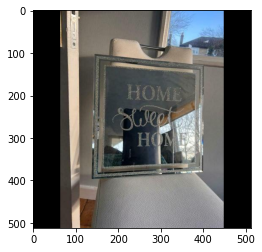

In [125]:
path_to_cleaned_images = "cleaned_images/"
for i in range(1):
    x = tabular_data_4.iat[i,1]
    y = (f"resized_{x}")
    print(y)
    img_array = mpimg.imread(f'{path_to_cleaned_images}{y}.jpg')
    imgplot = plt.imshow(img_array)
    # print(np.nonzero(img_array))
    print(img_array)
    # a = np.array(img_array)
    # z = tabular_data_4[i,2]
    # z.append(img_array)
    # tabular_data_4.head(5)
    # a = df.squeeze()
    # print(a.dtype)
    # tabular_data_4['img_array'].append(df)
tabular_data_4.head(10)

# unique_categories = tabular_data_1["category1"].unique()
# X = list(unique_categories)
# print(X)
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(X)

In [ ]:
# load pickle file into new dataframe
image_dataframe = pd.read_pickle('images_data.pkl')
image_dataframe['image_array'] = image_dataframe['image_array'].apply(lambda x: x.flatten())

# features
X = list(image_dataframe['image_array'])

# target
y = list(image_dataframe['category'])

# pipeline?

# parameters?

# split data in to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# split test data into val/test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# instantiate and fit Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# predict
predictions = logistic_regression.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy Score: {accuracy}')